In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('iris.csv')

In [46]:
dat.iloc[60:80, :] = 4
#dat.iloc[70] = 0.2

/Users/feizhan/miniconda/envs/py3_env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


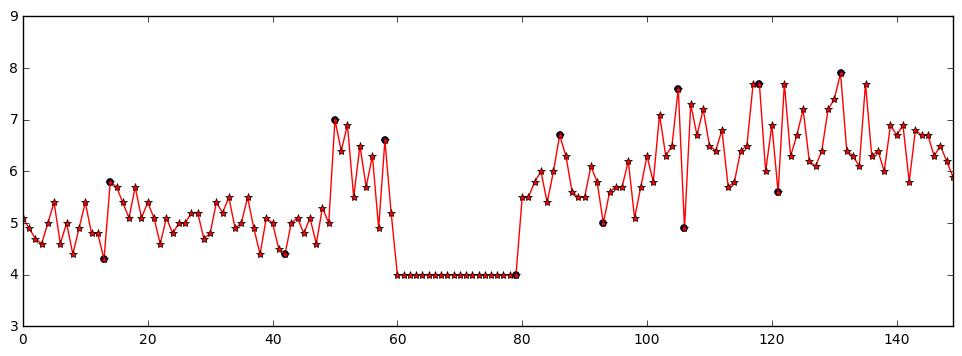

In [49]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
dat.loc[:, 'SepalLength'].plot(ax=ax, marker='*', color='r')
local_min_ind, local_min, local_max_ind, local_max = find_local_min_max(dat.loc[:, 'SepalLength'], 0.3)
ax.scatter(local_min_ind, local_min)
ax.scatter(local_max_ind, local_max)

In [48]:
def find_local_min_max(series, contrast):
    state = {
        'pmin': None,
        'pmin_ind': None,
        'pmax': None,
        'pmax_ind': None,
        'lmin': None,
        'lmax': None
    }
    # initialise, all starting points are potential local min and local max
    state['pmin_ind'] = series.index.tolist()[0]
    state['pmin'] = series.iat[0]
    state['pmax_ind'] = series.index.tolist()[0]
    state['pmax'] = series.iat[0]
    # store true local mins and maxes
    local_min_ind = []
    local_min = []
    local_max_ind = []
    local_max = []
    # walk through all rows
    for ind, value in series.iteritems():
        if state['pmin'] is not None and state['pmax'] is not None:
            # when just starts out or find a potential extreme after confirming a local extreme
            if value <= state['pmin']:
                # value is smaller then update potential min
                state['pmin'] = value
                state['pmin_ind'] = ind
                if value * (1 + contrast) <= state['pmax']:
                    # if the gap between current point and potential max is larger than contrast
                    # then confirm the last potential max is a true local max
                    state['lmax'] = state['pmax']
                    local_max_ind.append(state['pmax_ind'])
                    local_max.append(state['pmax'])
                    # so for a moment no potential max
                    state['pmax'] = None
                    state['pmax_ind'] = None
            elif value >= state['pmax']:
                # value is larger then update potential max
                state['pmax'] = value
                state['pmax_ind'] = ind
                if value > state['pmin'] * (1 + contrast):
                    # if the gap between current point and potential min is larger than contrast
                    # then confirm the last potential min is a true local min
                    state['lmin'] = state['pmin']
                    local_min_ind.append(state['pmin_ind'])
                    local_min.append(state['pmin'])
                    # so for a moment no potential min
                    state['pmin'] = None
                    state['pmin_ind'] = None
            else:
                # point is between potenital min and potential max
                # just pass without updating
                pass
        elif state['pmax'] is not None and state['lmin'] is not None:
            # when just found a local min, trying to find next local max
            if value >= state['pmax']:
                # update if value is larger
                state['pmax'] = value
                state['pmax_ind'] = ind
            elif value <= state['lmin']:
                # this is where it just after a sharp blip
                # confirm the last point is a local max
                state['lmax'] = state['pmax']
                local_max_ind.append(state['pmax_ind'])
                local_max.append(state['pmax'])
                # so for a moment no potential max
                state['pmax'] = None
                state['pmax_ind'] = None
                # the current point becomes a potential min
                state['pmin'] = value
                state['pmin_ind'] = ind
            else:
                # smaller than the last point, so this is a potential min
                state['lmin'] = None
                state['pmin'] = value
                state['pmin_ind'] = ind
        elif state['pmin'] is not None and state['lmax'] is not None:
            # when just found a local max, trying to find the next local min
            if value <= state['pmin']:
                # update if value is smaller
                state['pmin'] = value
                state['pmin_ind'] = ind
            elif value >= state['lmax']:
                # this is where just after a deep dip
                # confirm the last point is a local min
                state['lmin'] = state['pmin']
                local_min_ind.append(state['pmin_ind'])
                local_min.append(state['pmin'])
                # so for a moment no potential min
                state['pmin'] = None
                state['pmin_ind'] = None
                # the current point becomes a potential max
                state['pmax'] = value
                state['pmax_ind'] = ind
            else:
                # larger than the last point, so this is a potential max
                state['lmax'] = None
                state['pmax'] = value
                state['pmax_ind'] = ind
        else:
            print('strange')
    return local_min_ind, local_min, local_max_ind, local_max

In [3]:
dat.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dat.Name.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Name, dtype: int64

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


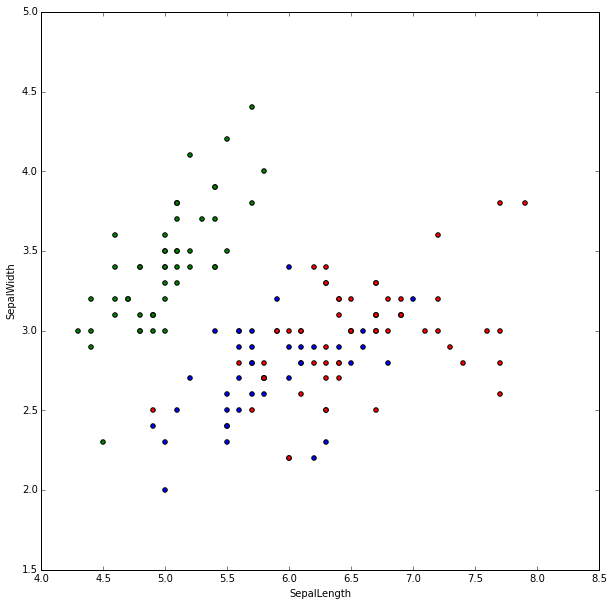

In [8]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='SepalLength', y='SepalWidth', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='SepalLength', y='SepalWidth', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='SepalLength', y='SepalWidth', ax=ax, color='green')

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


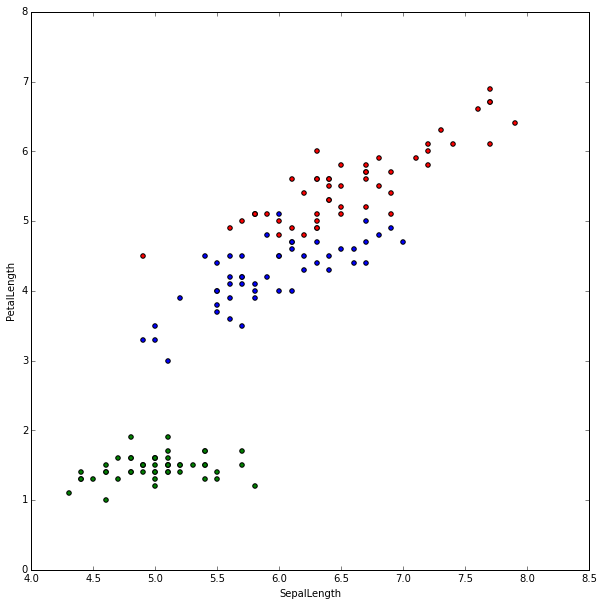

In [9]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='SepalLength', y='PetalLength', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='SepalLength', y='PetalLength', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='SepalLength', y='PetalLength', ax=ax, color='green')

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


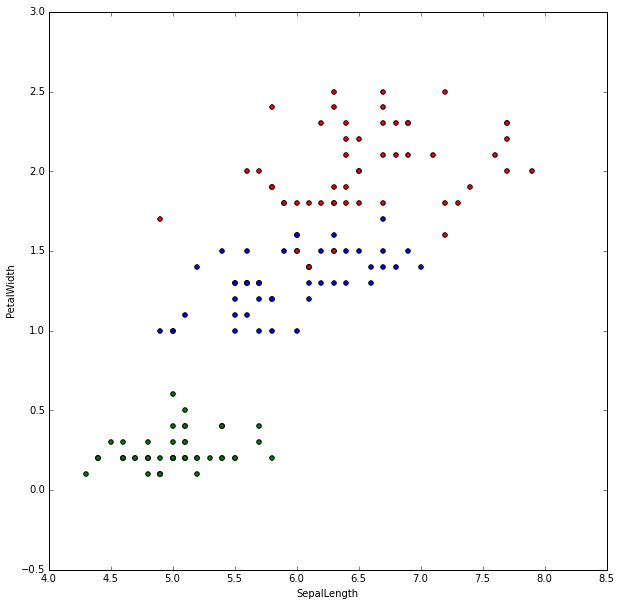

In [10]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='SepalLength', y='PetalWidth', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='SepalLength', y='PetalWidth', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='SepalLength', y='PetalWidth', ax=ax, color='green')

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


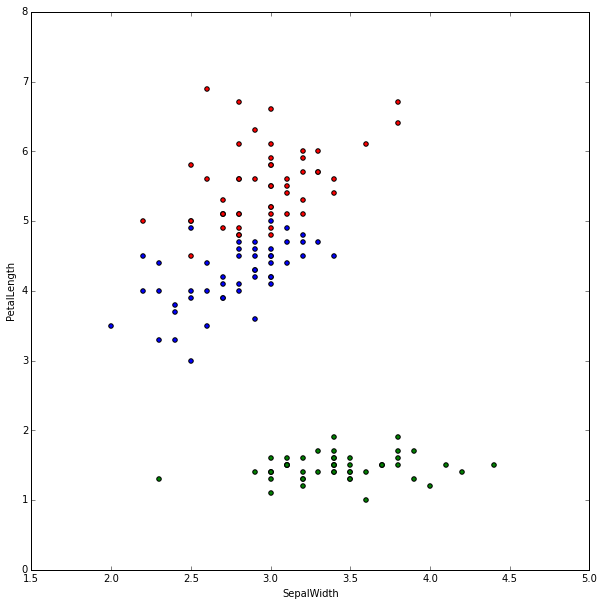

In [11]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='SepalWidth', y='PetalLength', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='SepalWidth', y='PetalLength', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='SepalWidth', y='PetalLength', ax=ax, color='green')

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


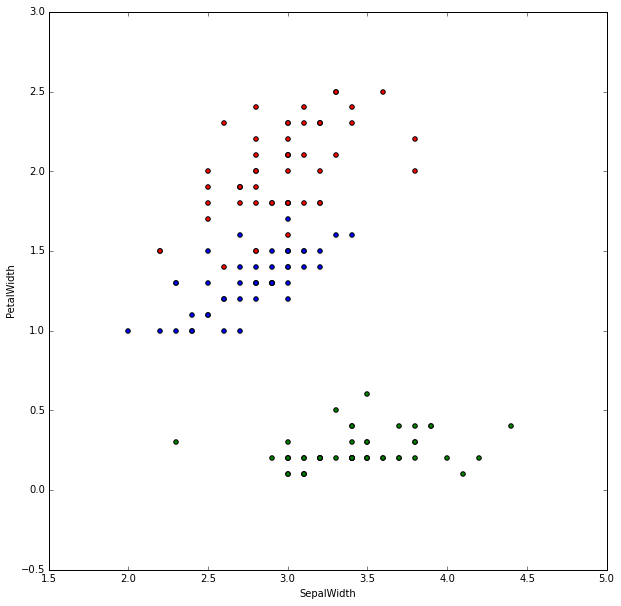

In [12]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='SepalWidth', y='PetalWidth', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='SepalWidth', y='PetalWidth', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='SepalWidth', y='PetalWidth', ax=ax, color='green')

/home/fei/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


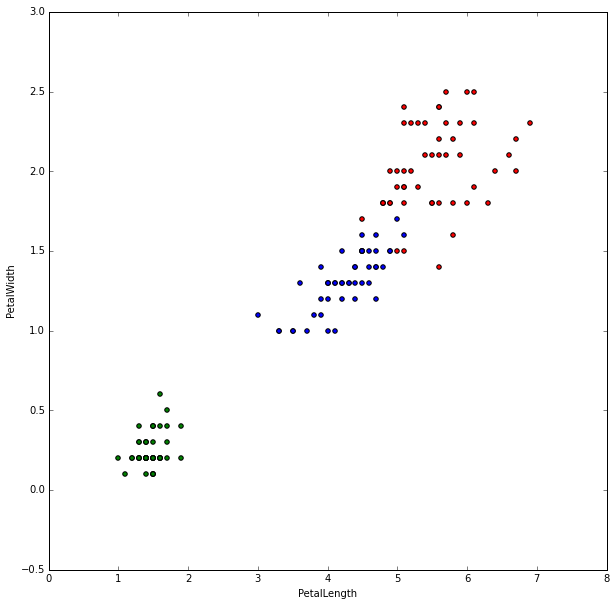

In [13]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
dat.loc[(dat.Name == 'Iris-versicolor').values, :].plot(kind='scatter', x='PetalLength', y='PetalWidth', ax=ax)
dat.loc[(dat.Name == 'Iris-virginica').values, :].plot(kind='scatter', x='PetalLength', y='PetalWidth', ax=ax, color='r')
dat.loc[(dat.Name == 'Iris-setosa').values, :].plot(kind='scatter', x='PetalLength', y='PetalWidth', ax=ax, color='green')